# This notebook test different algorithm using 3D coordiantes only(object kind is not provided)

In [1]:
import numpy as np
%matplotlib notebook
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from utils.data import fetch_data, fetch_data_with_label, generate_data, label_to_int, divide_data
from utils.plotting import plot
from utils.clustering import agg_clustering, kmeans, gaussian_mixture
from sklearn.metrics import adjusted_rand_score

In [2]:
logfile_path = ['../data/raw/1599166289/data.pickle', '../data/raw/1599153598/data.pickle', '../data/raw/test/data.pickle']
# coordinates for nut and bolt
coord_nut, label_nut, coord_bolt, label_bolt = fetch_data_with_label(logfile_path)

<IPython.core.display.Javascript object>


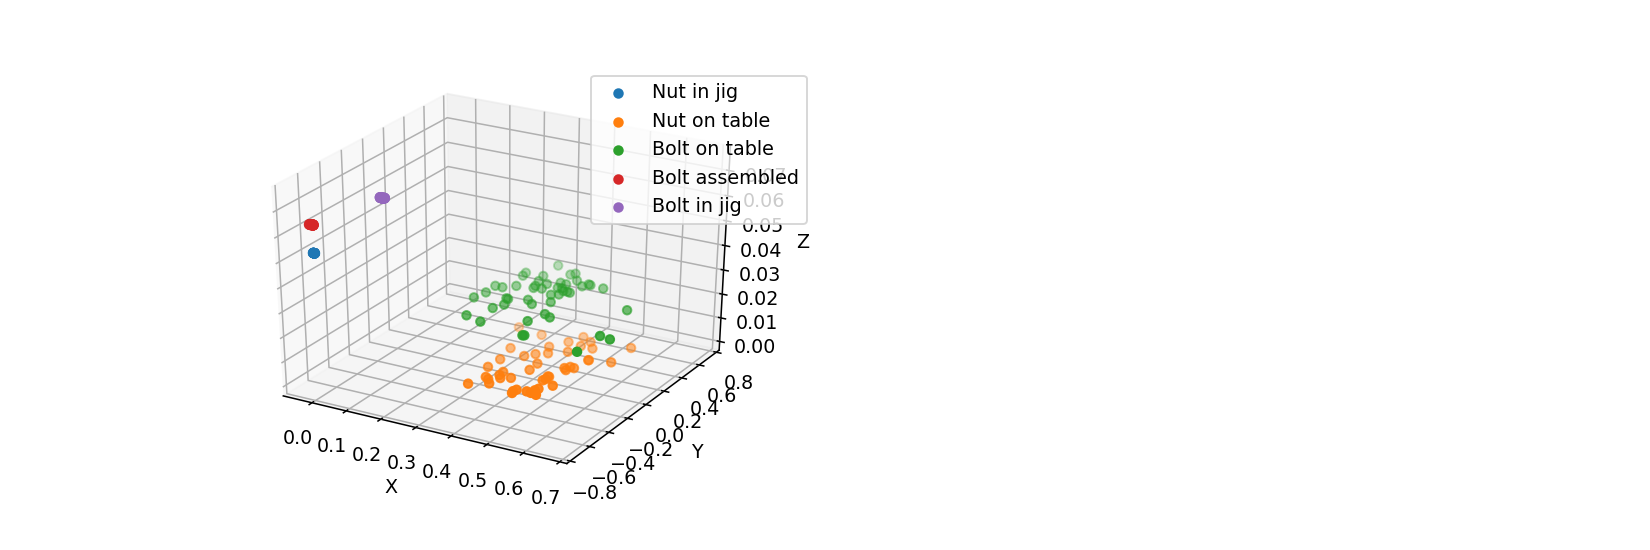

In [3]:
fig = plt.figure(1, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut, label_nut)
plot(ax, coord_bolt, label_bolt)

In [4]:
coord_concat = np.concatenate((coord_nut, coord_bolt))
estimated_label = agg_clustering(coord_concat, 'p_norm', thres = 0.0005)

<IPython.core.display.Javascript object>


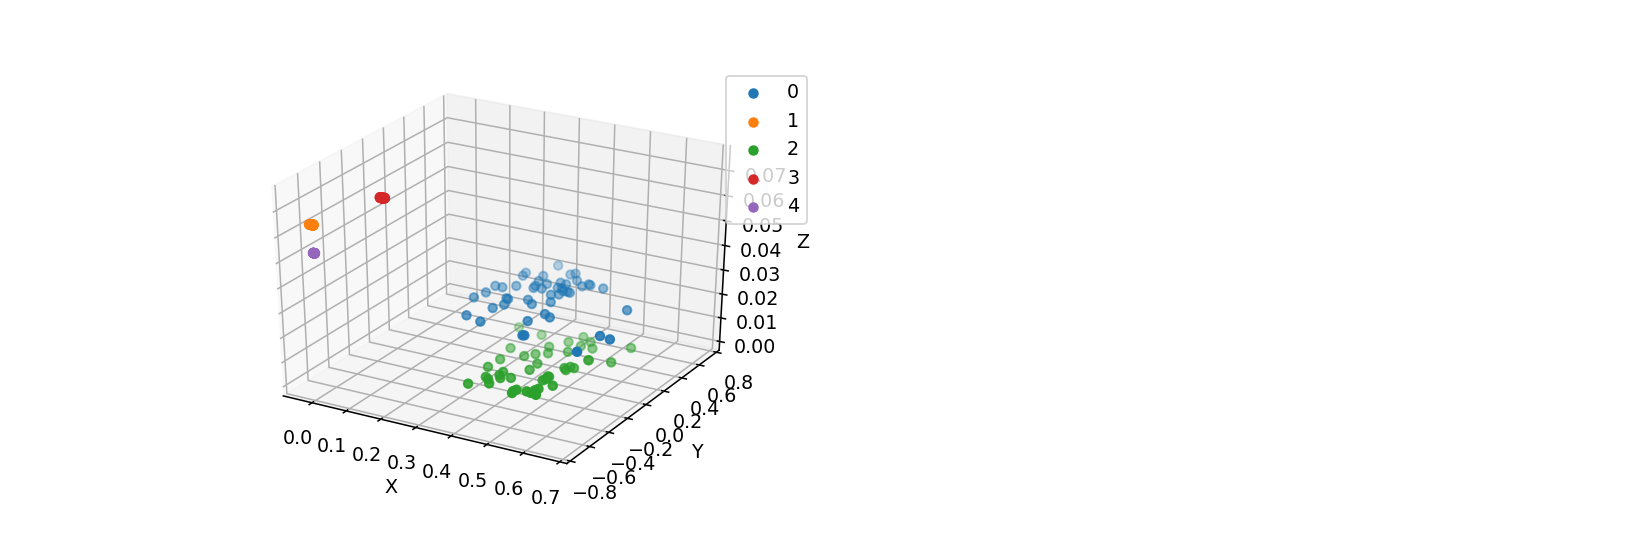

In [5]:
fig = plt.figure(2, (12,4))
ax2 = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax2, coord_concat, estimated_label)

In [6]:
label_seq = ['Nut on table', 'Nut in jig', 'Bolt on table', 'Bolt in jig', 'Bolt assembled']
label_concat = np.concatenate((label_nut, label_bolt))
label_concat_int = label_to_int(label_concat)
print(adjusted_rand_score(estimated_label, label_concat_int))

1.0


# Add noise

In [7]:
u = 0  # The average shift between the approximated coordinates and ground truth
sigma = 0.005
noise_nut = np.random.normal(u, sigma, coord_nut.shape)
noise_bolt = np.random.normal(u, sigma, coord_bolt.shape)

coord_nut_noisy = coord_nut + noise_nut
coord_bolt_noisy = coord_bolt + noise_bolt


<IPython.core.display.Javascript object>


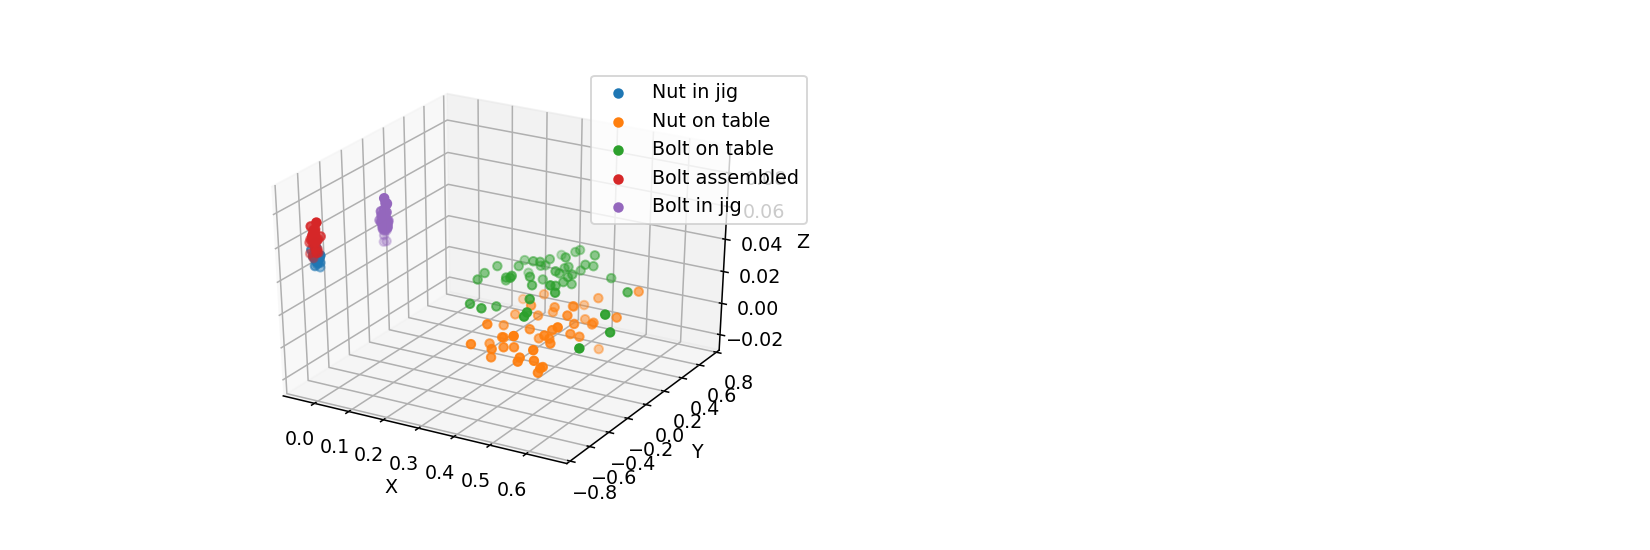

In [8]:
fig = plt.figure(3, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut_noisy, label_nut)
plot(ax, coord_bolt_noisy, label_bolt)

# Agglomerative with P-nom and thres

In [9]:
coord_concat_noisy = np.concatenate((coord_nut_noisy, coord_bolt_noisy))
estimated_label_noisy = agg_clustering(coord_concat_noisy, 'p_norm', thres = 0.012)

In [10]:
max(estimated_label_noisy)

5

<IPython.core.display.Javascript object>


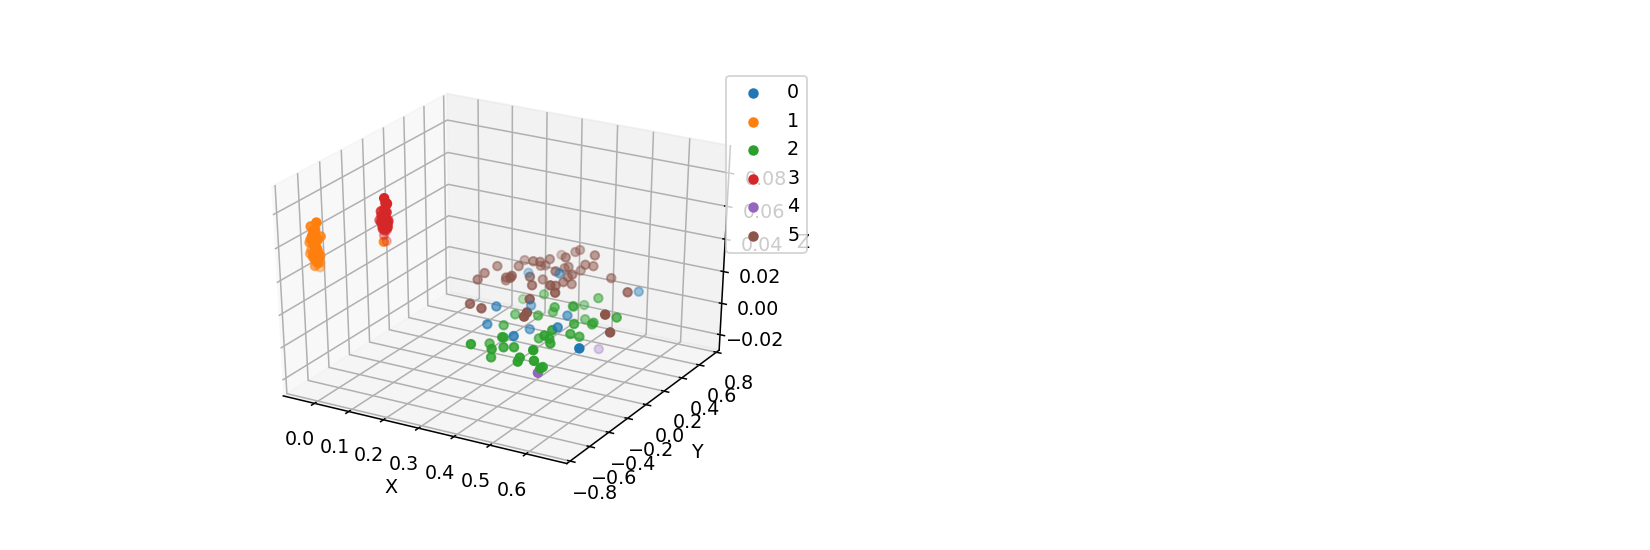

0.7140357650599926


In [11]:
fig = plt.figure(4, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# Agglomerative with P-nom and number of clusters


<IPython.core.display.Javascript object>


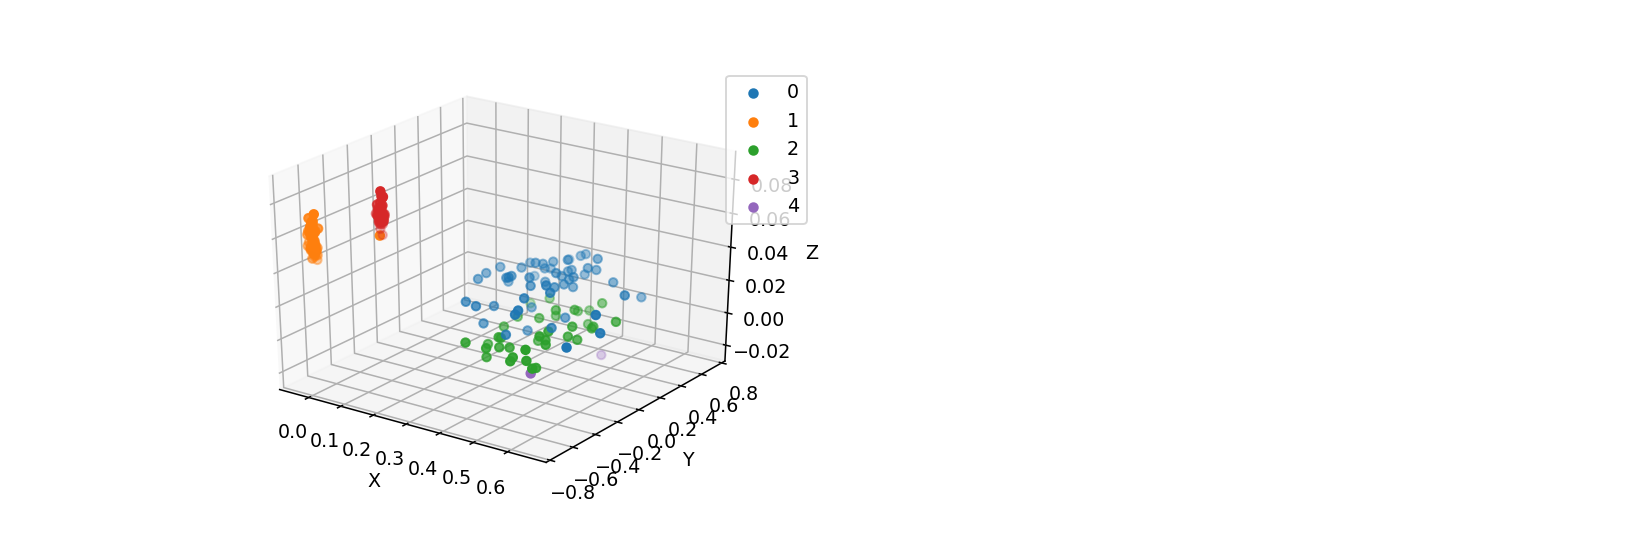

0.7088484072994276


In [12]:
estimated_label_noisy = agg_clustering(coord_concat_noisy, 'p_norm', thres = None, n_clusters = 5)
fig = plt.figure(5, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# Agglomerative with Euclidean and number of clusters

<IPython.core.display.Javascript object>


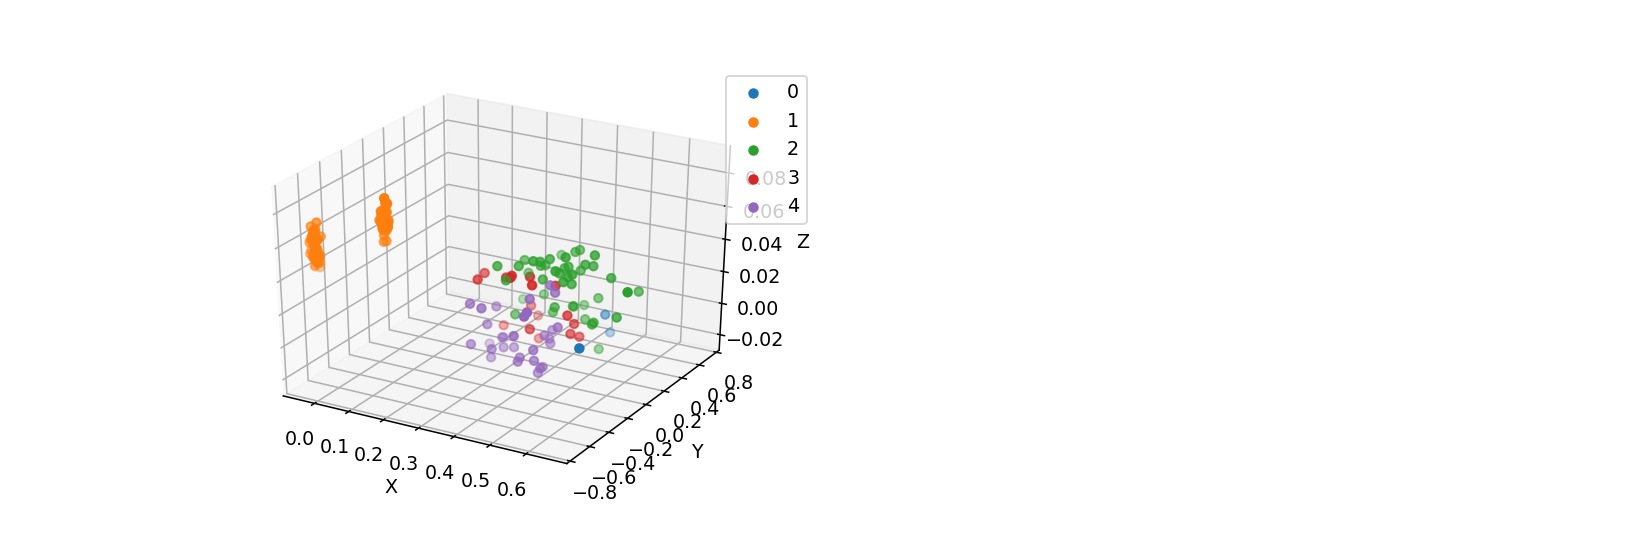

0.30076594568337706


In [13]:
estimated_label_noisy = agg_clustering(coord_concat_noisy, 'euclidean', thres = None, n_clusters = 5)
fig = plt.figure(6, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# Agglomerative with Cosine and number of clusters

<IPython.core.display.Javascript object>


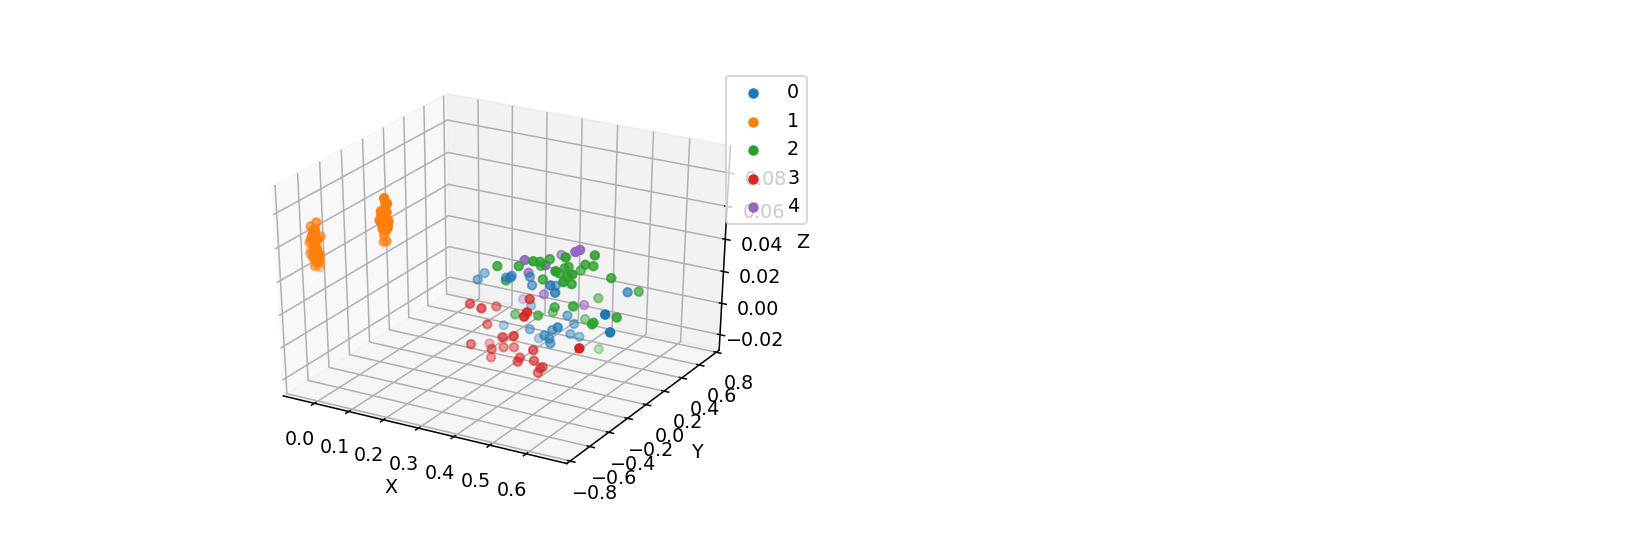

0.2802573913894446


In [14]:
estimated_label_noisy = agg_clustering(coord_concat_noisy, 'cosine', thres = None, n_clusters = 5)
fig = plt.figure(7, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# K-means with p-norm

<IPython.core.display.Javascript object>


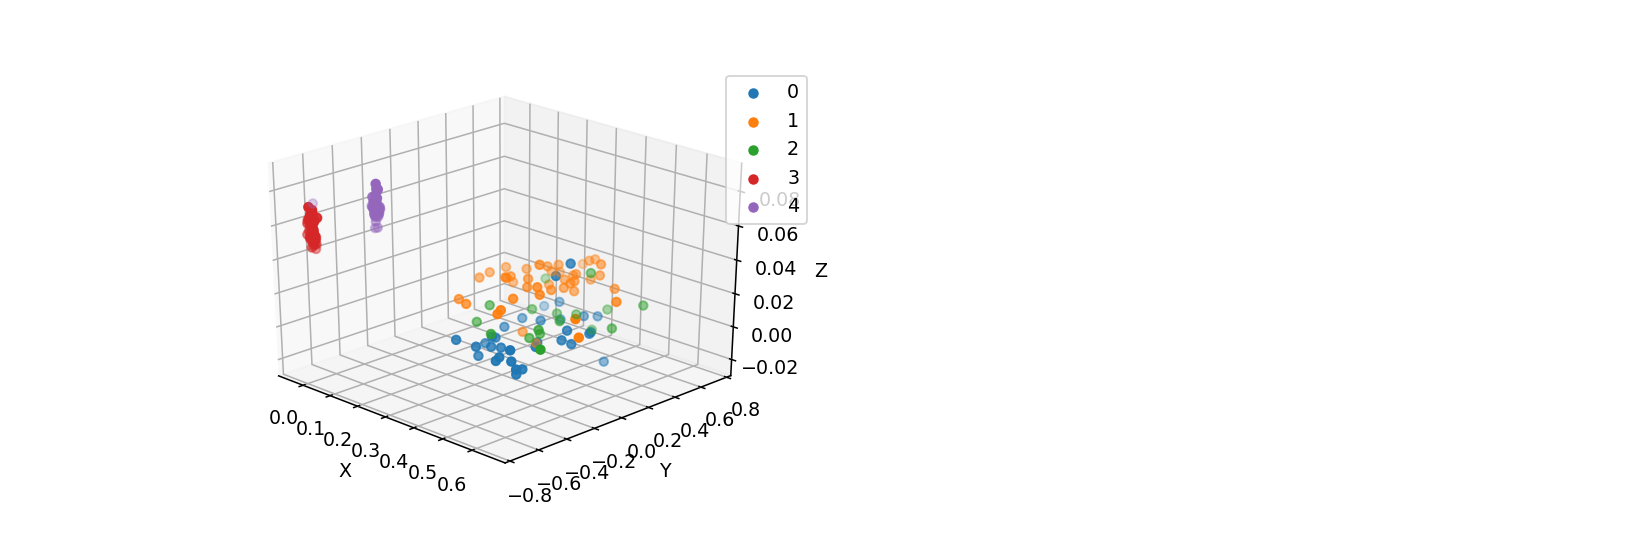

0.6769226663307034


In [16]:
n_clusters = 5
estimated_label_noisy, centers = kmeans(coord_concat_noisy, n_clusters, 'p_norm')

fig = plt.figure(8, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# K-means with Euclidean

<IPython.core.display.Javascript object>


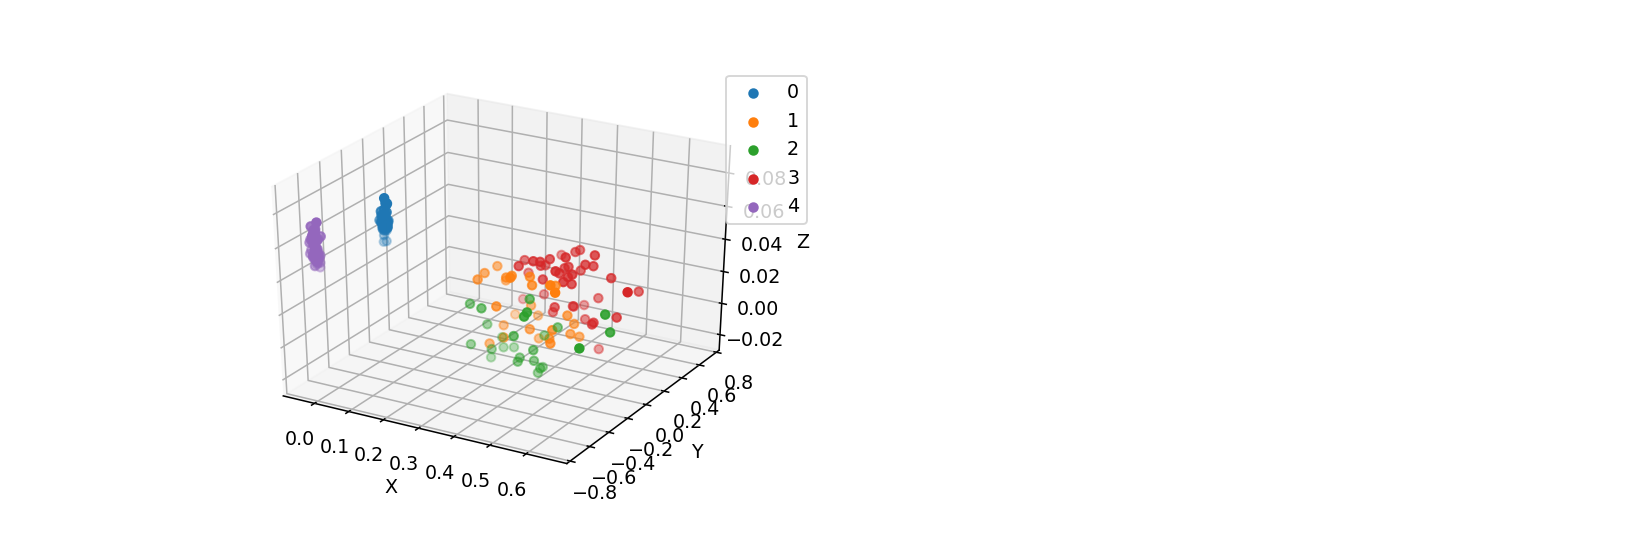

0.5517869992094393


In [18]:
estimated_label_noisy, centers = kmeans(coord_concat_noisy, n_clusters, 'euclidean')
fig = plt.figure(9, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# K-means with Cosine similarity

<IPython.core.display.Javascript object>


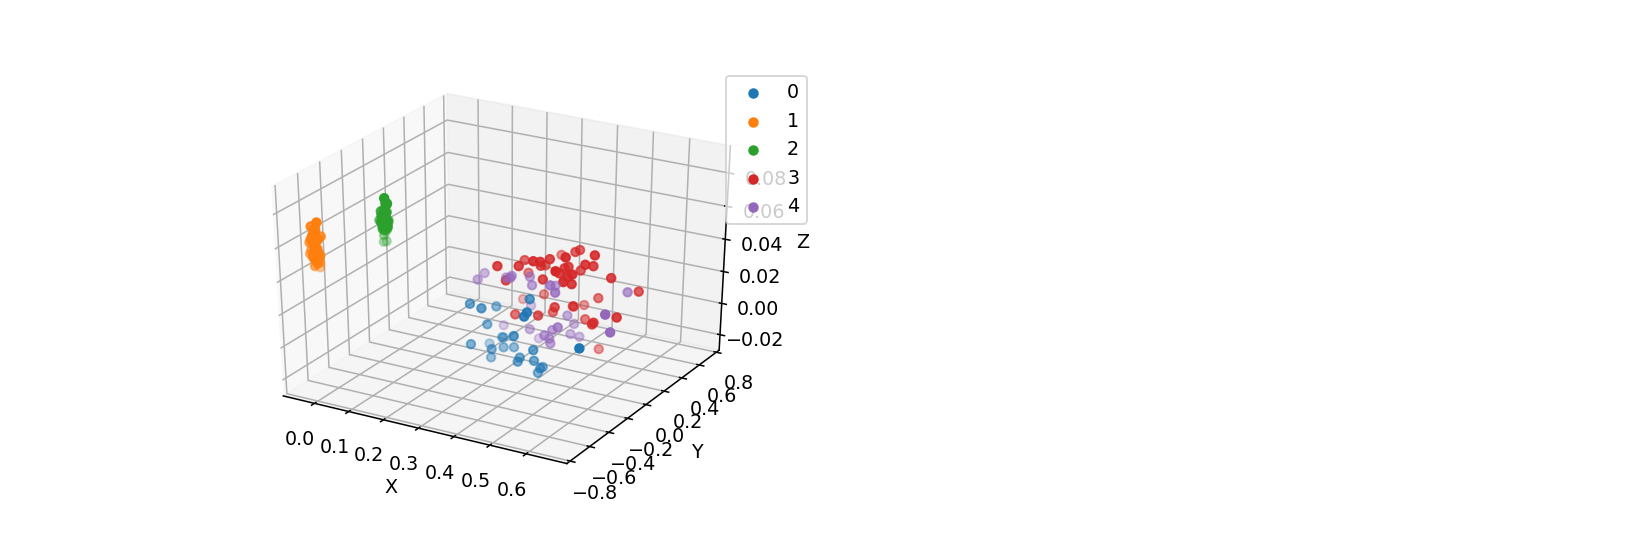

0.5527222598689111


In [19]:
estimated_label_noisy, centers = kmeans(coord_concat_noisy, n_clusters, 'cosine')

fig = plt.figure(10, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))

# Gaussian mixture model

<IPython.core.display.Javascript object>


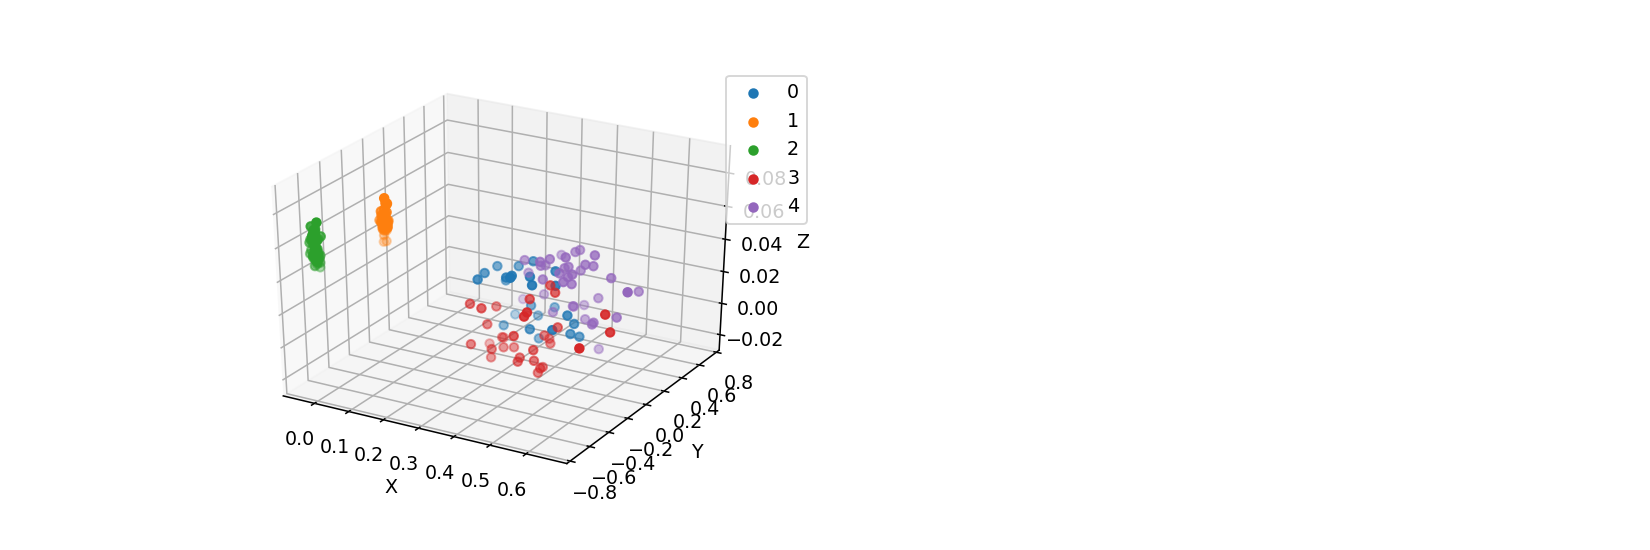

0.5488686804495069


In [20]:
estimated_label_noisy, em = gaussian_mixture(coord_concat_noisy, n_clusters)

fig = plt.figure(11, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_concat_noisy, estimated_label_noisy)
print(adjusted_rand_score(estimated_label_noisy, label_concat_int))